In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [2]:
f1_data = pd.read_csv('data.csv')  

In [3]:
race1_data = f1_data[f1_data["race_circuit"] == "race_01_albert_park"]
# f1_data["race_circuit"].drop_duplicates()[0:1] # Alternative race track selection method

In [4]:
driver_names = [
    ["bottas","V. Bottas"],
    ["hamilton","L. Hamilton"],
    ["vettel","S. Vettel"],
    ["max_verstappen","M. Verstappen"],
    ["leclerc","C. Leclerc"],
    ["kevin_magnussen","K. Magnussen"],
    ["grosjean","R. Grosjean"],
    ["hulkenberg","N. Hulkenberg"],
    ["raikkonen", "K. Raikkonen"],
]

In [5]:
for column in range(len(race1_data)):
    for name in range(len(driver_names)):
        if driver_names[name][0] == race1_data["driver"][column]:
            race1_data["driver"][column] = driver_names[name][1]            

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# Converting time strings into timeformat datatype
race1_data.loc[:, "lap_time"] = pd.to_datetime(race1_data.loc[:, "lap_time"].copy().str.replace(".",":"), 
                                               format="%M:%S:%f")

/opt/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
driver_list = race1_data["driver"].drop_duplicates()

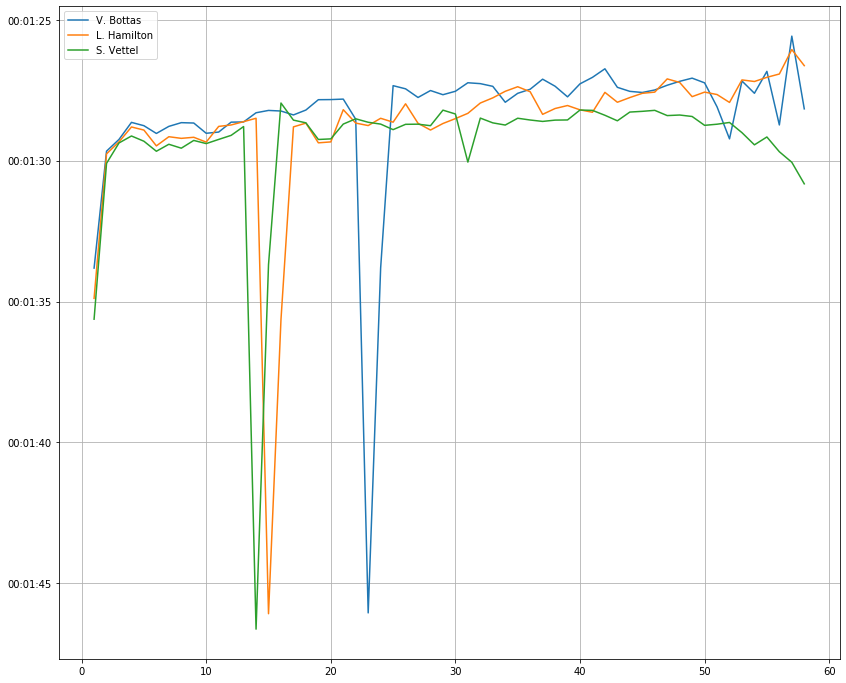

In [8]:
plt.figure(figsize=(14, 12))
for driver in driver_list[:3]:
    x = race1_data[race1_data["driver"]==str(driver)]["lap"]
    y = race1_data[race1_data["driver"]==str(driver)]["lap_time"]
    plt.plot(x, y, label=str(driver))
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.show()

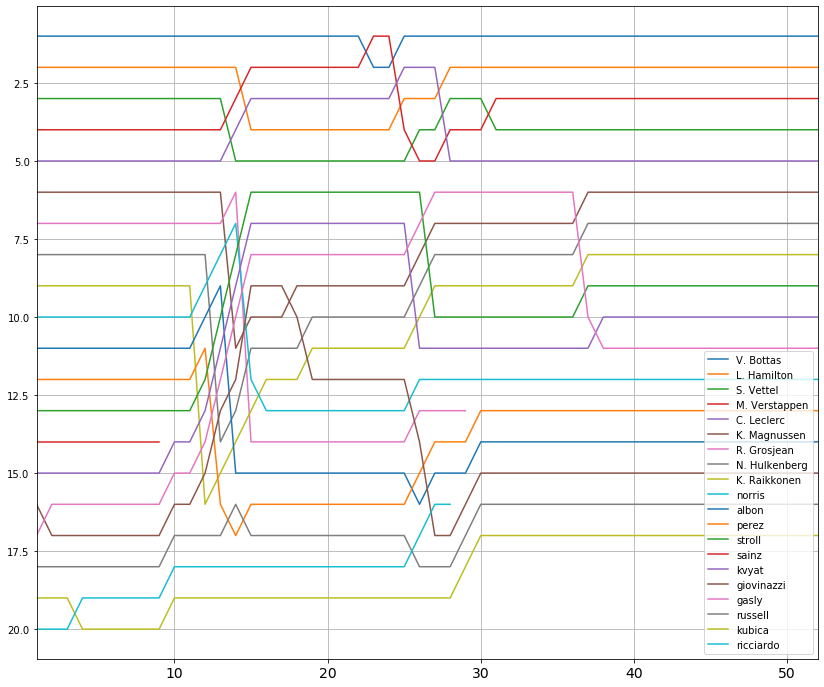

In [9]:
plt.figure(figsize=(14, 12))
for driver in driver_list:
    x = race1_data[race1_data["driver"]==str(driver)]["lap"]
    y = race1_data[race1_data["driver"]==str(driver)]["position"]
    plt.plot(x, y, label=str(driver))
plt.xlim(1, 52)
# plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)    
plt.xticks(fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.show()